# Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
personal_path = "/content/drive/MyDrive/selected_data"
single_filename = os.path.join(personal_path ,"single_file_kfalldataset_3labels.csv")

In [4]:
df = pd.read_csv(single_filename)
df

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,C1,C2,Roll,Pitch,Yaw,Condition
0,0.01,-0.250,-0.809,-0.188,-35.122325,14.954204,4.755551,0.312800,-0.351223,0.877754,-0.432819,0.149542,0
1,0.02,-0.070,-1.023,0.056,-2.578311,-0.171887,-0.114592,0.089644,-0.025783,-0.881074,-0.045101,359.998281,0
2,0.03,-0.070,-1.019,0.056,-3.781523,0.859437,-0.286479,0.089644,-0.037815,-0.882723,-0.057149,0.008594,0
3,0.04,-0.070,-1.019,0.044,-5.385805,1.948057,-0.458366,0.082680,-0.053858,-0.887782,-0.073123,0.019481,0
4,0.05,-0.069,-1.025,0.028,-6.531721,2.578311,-0.687550,0.074465,-0.065317,-0.894579,-0.084145,0.025783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166758,10.64,-0.011,-0.115,1.010,0.000000,0.057296,0.000000,1.010060,0.000000,-0.480079,-0.003084,0.000573,0
166759,10.65,-0.011,-0.115,1.011,0.000000,0.057296,0.000000,1.011060,0.000000,-0.480047,-0.003081,0.000573,0
166760,10.66,-0.011,-0.115,1.013,0.000000,0.000000,0.000000,1.013060,0.000000,-0.479984,-0.003075,0.000000,0
166761,10.67,-0.011,-0.115,1.013,-0.057296,0.000000,0.000000,1.013060,-0.000573,-0.479984,-0.003646,0.000000,0


In [5]:
columns = ['Timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Condition']

In [6]:
data = pd.DataFrame(data = df, columns = columns)
data.head()

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,Condition
0,0.01,-0.250,-0.809,-0.188,-35.122325,14.954204,4.755551,0
1,0.02,-0.070,-1.023,0.056,-2.578311,-0.171887,-0.114592,0
2,0.03,-0.070,-1.019,0.056,-3.781523,0.859437,-0.286479,0
3,0.04,-0.070,-1.019,0.044,-5.385805,1.948057,-0.458366,0
4,0.05,-0.069,-1.025,0.028,-6.531721,2.578311,-0.687550,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166763 entries, 0 to 166762
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  166763 non-null  float64
 1   Ax         166763 non-null  float64
 2   Ay         166763 non-null  float64
 3   Az         166763 non-null  float64
 4   Gx         166763 non-null  float64
 5   Gy         166763 non-null  float64
 6   Gz         166763 non-null  float64
 7   Condition  166763 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 10.2 MB


In [8]:
data['Condition'].value_counts()

0    82290
2    70126
1    14347
Name: Condition, dtype: int64

# Analyze Data by Plot

In [9]:
activities = data['Condition'].value_counts().index
Fs = 100

def plot_activity(condition, data):
  # fig, (ax0, ax1, ax2, gx0, gx1, gx2) = plt.subplots(nrows=6, figsize=(15, 7), sharex=True)
  fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
  plot_axis(ax0, data['Timestamp'], data['Ax'], 'Ax-Axis')
  plot_axis(ax1, data['Timestamp'], data['Ay'], 'Ay-Axis')
  plot_axis(ax2, data['Timestamp'], data['Az'], 'Az-Axis')
  # plot_axis(gx0, data['Timestamp'], data['Gx'], 'Gx-Axis')
  # plot_axis(gx1, data['Timestamp'], data['Gy'], 'Gx-Axis')
  # plot_axis(gx2, data['Timestamp'], data['Gz'], 'Gx-Axis')
  plt.subplots_adjust(hspace=0.2)
  fig.suptitle(condition)
  plt.subplots_adjust(top=0.90)
  plt.show()

def plot_axis(ax, x, y, title):
  ax.plot(x, y, 'g')
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
  ax.set_xlim([min(x), max(x)])
  ax.grid(True)


In [10]:
Walk = df[df['Condition'] == 0]
Fall = df[df['Condition'] == 1]
OnTheFLoor = df[df['Condition'] == 2]

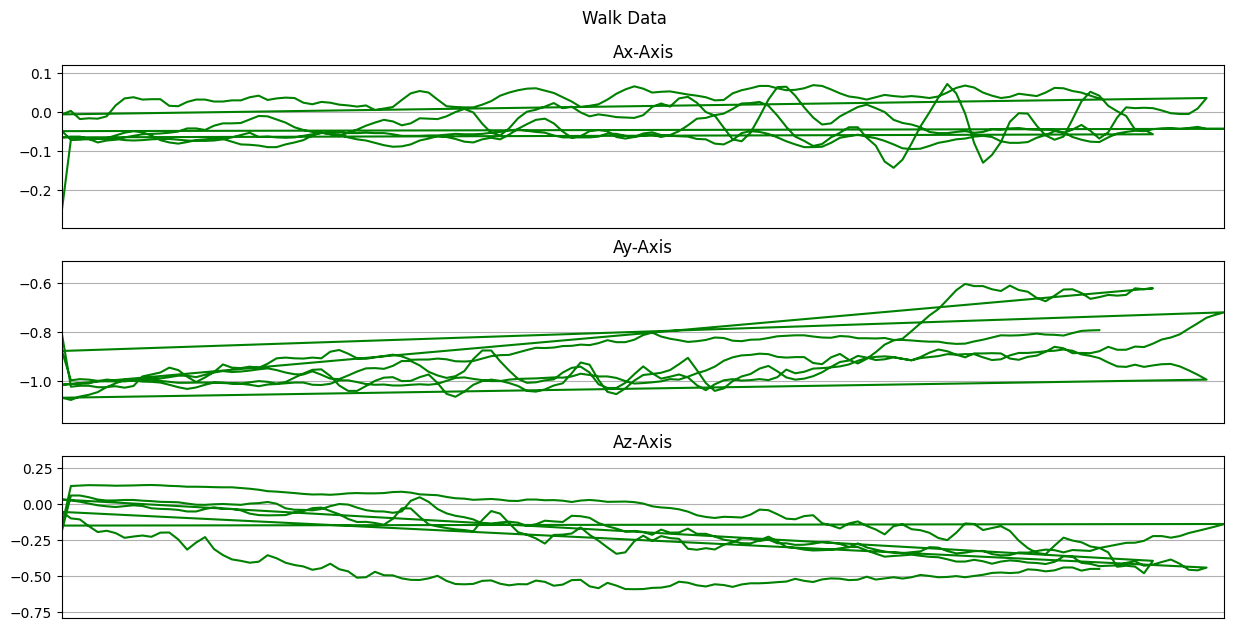

In [11]:
data_for_plot = Walk[:Fs*5]
plot_activity('Walk Data', data_for_plot)

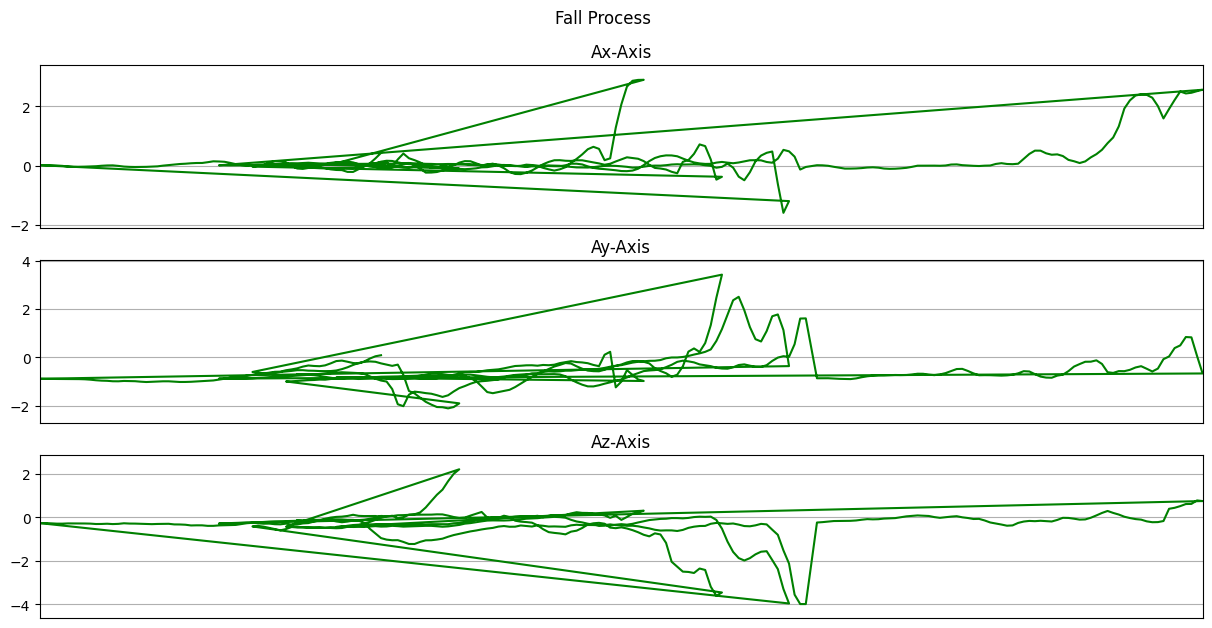

In [12]:
data_for_plot = Fall[:Fs*5]
plot_activity('Fall Process', data_for_plot)

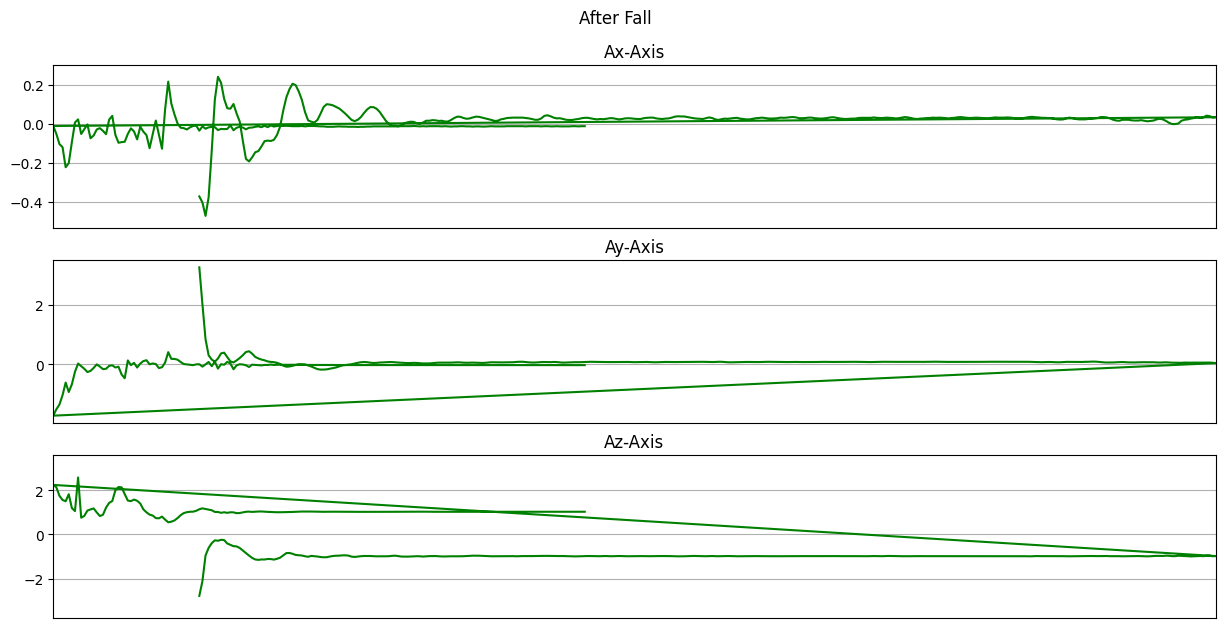

In [13]:
data_for_plot = OnTheFLoor[:Fs*5]
plot_activity('After Fall', data_for_plot)

In [14]:
X = df[['Timestamp','Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']]
y = df['Condition']

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Timestamp','Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz'])
scaled_X['label'] = y.values

scaled_X.head()

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,label
0,-1.612177,-0.653725,-0.600142,-0.168887,-0.683462,0.391199,0.223155,0
1,-1.607828,-0.253257,-0.980033,0.189976,0.036204,-0.016811,0.024784,0
2,-1.603479,-0.253257,-0.972932,0.189976,0.009597,0.011008,0.017783,0
3,-1.599130,-0.253257,-0.972932,0.172327,-0.025880,0.040372,0.010782,0
4,-1.594780,-0.251032,-0.983583,0.148795,-0.051220,0.057372,0.001447,0


In [16]:
Walk_processed = scaled_X[scaled_X['label'] == 0]
Fall_processed = scaled_X[scaled_X['label'] == 1]
OnTheFLoor_processed = scaled_X[scaled_X['label'] == 2]

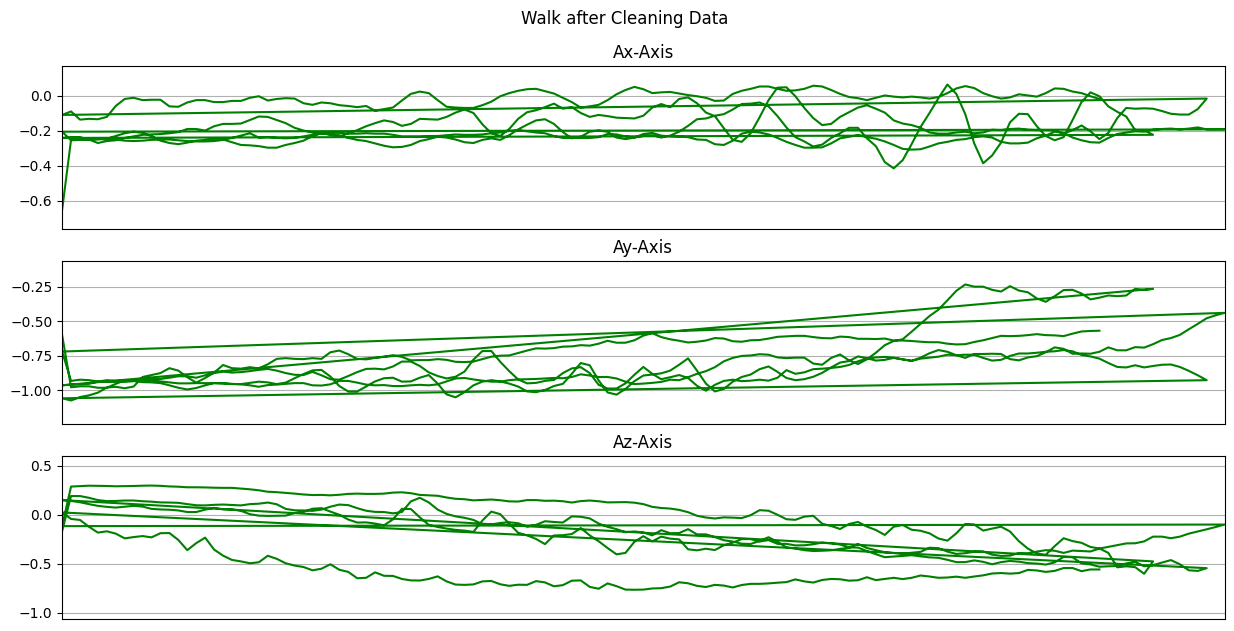

In [17]:
data_for_plot = Walk_processed[:Fs*5]
plot_activity('Walk after Cleaning Data', data_for_plot)

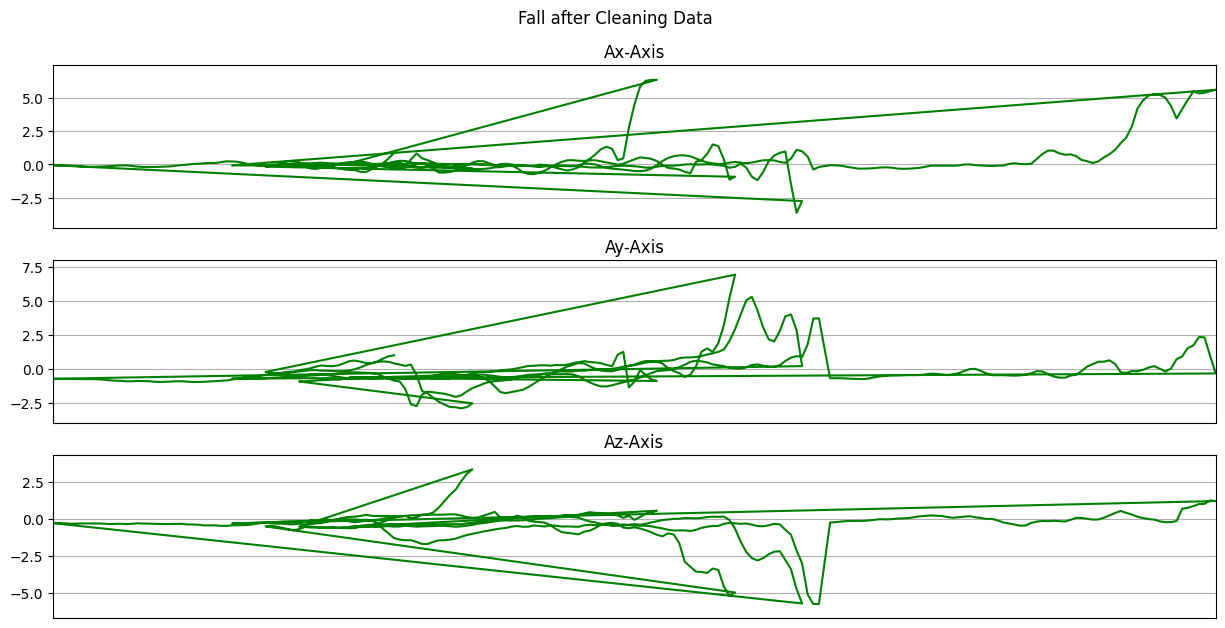

In [18]:
data_for_plot = Fall_processed[:Fs*5]
plot_activity('Fall after Cleaning Data', data_for_plot)

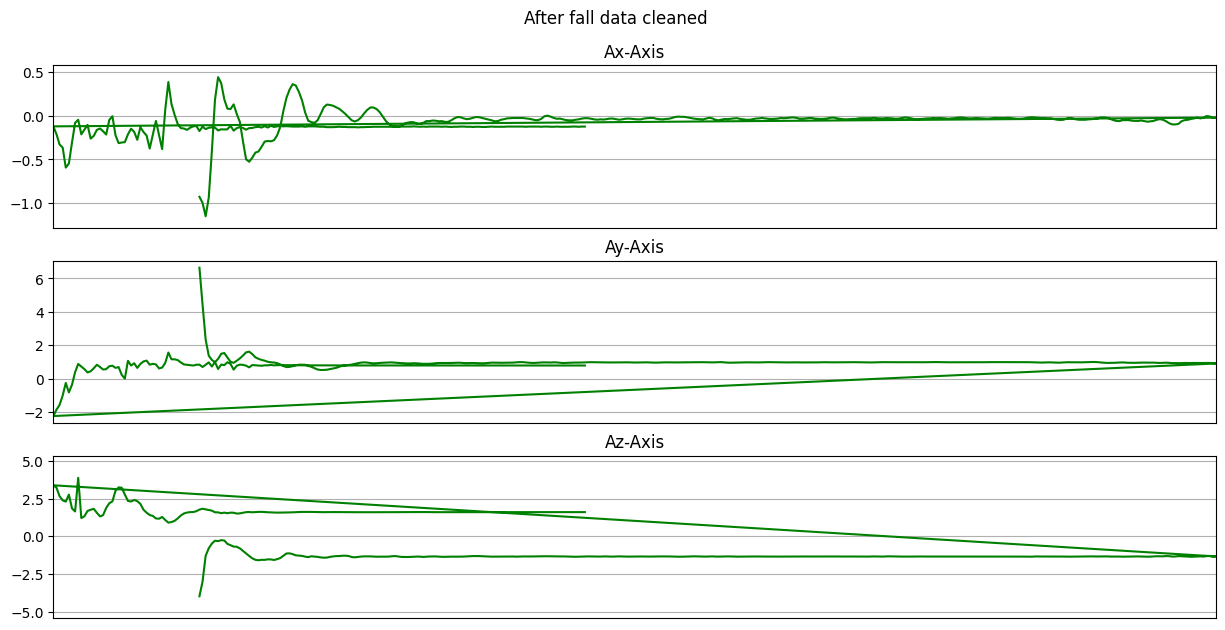

In [19]:
data_for_plot = OnTheFLoor_processed[:Fs*5]
plot_activity('After fall data cleaned', data_for_plot)

In [20]:
X = df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']]
y = df['Condition']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz'])
scaled_X['label'] = y.values

scaled_X.head()

,Ax,Ay,Az,Gx,Gy,Gz,label
0,-0.653725,-0.600142,-0.168887,-0.683462,0.391199,0.223155,0
1,-0.253257,-0.980033,0.189976,0.036204,-0.016811,0.024784,0
2,-0.253257,-0.972932,0.189976,0.009597,0.011008,0.017783,0
3,-0.253257,-0.972932,0.172327,-0.025880,0.040372,0.010782,0
4,-0.251032,-0.983583,0.148795,-0.051220,0.057372,0.001447,0


# Preprocessing Data

1. Spliting data
2. Use Standart Scaller to extract feature



In [21]:
X = scaled_X[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']]
y = scaled_X['label']

In [22]:
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
# Adapting the data labels to one-hot encoding using to_categorical function

from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [24]:
X_train.shape, X_test.shape

((133410, 6), (33353, 6))

In [25]:
y_train.shape, y_test.shape

((133410, 3), (33353, 3))

# Training Process

## Define Model Layer

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.12.0


In [27]:
# Delete existing models
tf.keras.backend.clear_session()

# Define the CNN model
model = tf.keras.Sequential([

    # Input layer
    tf.keras.layers.Reshape((6, 1), input_shape=(6,)),

    # Convolutional layer 1
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),

    # Convolutional layer 2
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),

    # Flatten the 2D feature maps into a 1D vector
    tf.keras.layers.Flatten(),

    # Fully-connected (Dense) layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer with 3 labels
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 6, 1)              0         
                                                                 
 conv1d (Conv1D)             (None, 6, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 32)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0

In [28]:
print(X_train.shape[1], y_train.shape[1])

6 3


In [ ]:
# # print model summary
# model.summary()
# learning_rate = optimizer.learning_rate.numpy()

# print("Learning rate:", learning_rate)

## COMPILE

In [29]:
# from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## TRAINING start

In [30]:
# Train model
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

epochs = 100
batch_size = 128

# history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/100
1043/1043 [==============================] - 15s 5ms/step - loss: 0.3123 - accuracy: 0.8923 - val_loss: 0.2779 - val_accuracy: 0.8972
Epoch 2/100
1043/1043 [==============================] - 4s 4ms/step - loss: 0.2575 - accuracy: 0.9013 - val_loss: 0.2686 - val_accuracy: 0.8989
Epoch 3/100
1043/1043 [==============================] - 6s 6ms/step - loss: 0.2448 - accuracy: 0.9050 - val_loss: 0.2744 - val_accuracy: 0.8967
Epoch 4/100
1043/1043 [==============================] - 5s 4ms/step - loss: 0.2350 - accuracy: 0.9091 - val_loss: 0.2539 - val_accuracy: 0.9056
Epoch 5/100
1043/1043 [==============================] - 5s 4ms/step - loss: 0.2277 - accuracy: 0.9122 - val_loss: 0.2405 - val_accuracy: 0.9083
Epoch 6/100
1043/1043 [==============================] - 5s 5ms/step - loss: 0.2213 - accuracy: 0.9152 - val_loss: 0.2357 - val_accuracy: 0.9094
Epoch 7/100
1043/1043 [==============================] - 4s 4ms/step - loss: 0.2169 - accuracy: 0.9161 - val_loss: 0.2380 - val_a

In [31]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

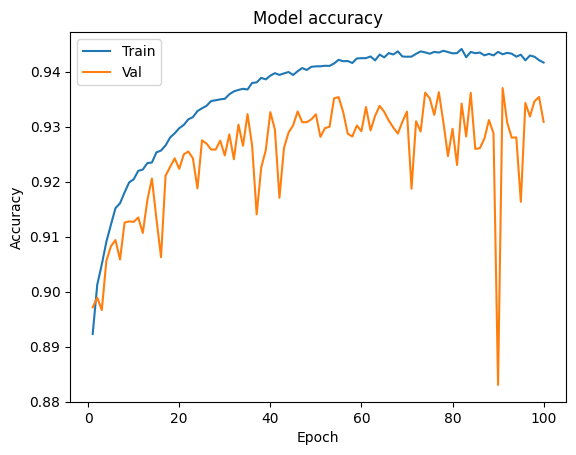

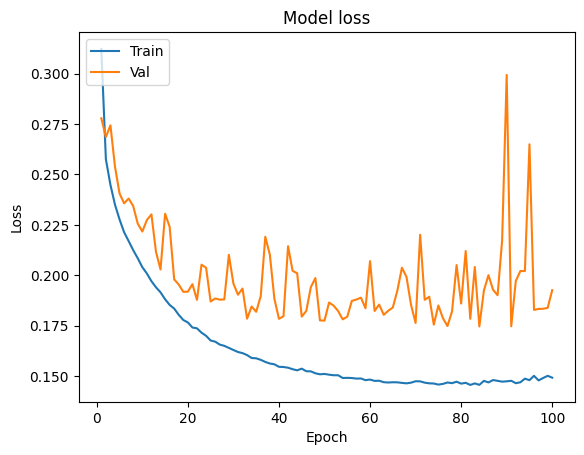

In [32]:
plot_learningCurve(history, epochs)

## Testing Model

### Convusion Matrix

In [35]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

In [40]:
# model = tf.keras.models.load_model('/content/drive/MyDrive/Model/modelnew.h5')

In [41]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred = to_categorical(y_pred, num_classes=3)

1043/1043 [==============================] - 2s 2ms/step


Confusion matrix class 0
[[16116   895]
 [  727 15615]]


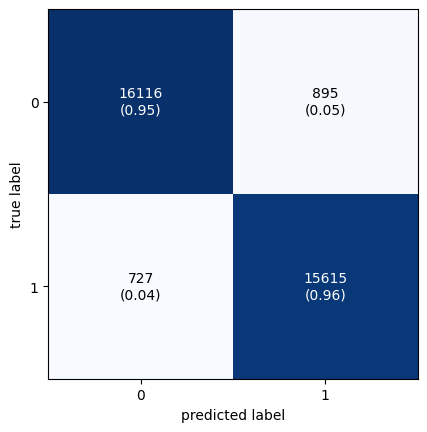

Confusion matrix class 1
[[30021   460]
 [  609  2263]]


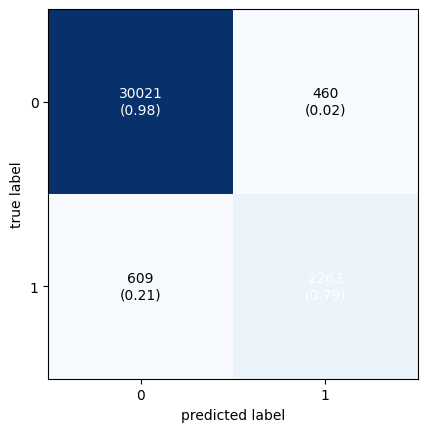

Confusion matrix class 2
[[18679   535]
 [  554 13585]]


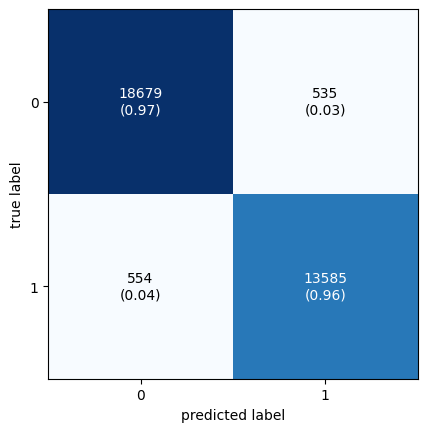

In [42]:
# Hitung confusion matrix untuk data test
y_pred = np.where(y_pred > 0.5, 1, 0) # binarize output
cm = multilabel_confusion_matrix(y_test, y_pred)
# Print confusion matrix
for i in range(cm.shape[0]):
    print(f"Confusion matrix class {i}")
    print(cm[i])
    plot_confusion_matrix(cm[i], show_normed=True)
    plt.show()

In [43]:
label = ['Stand', 'Fall', 'On Floor']
print(classification_report(y_test, y_pred, target_names = label, digits=4))

# accuracy score
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi: ",akurasi)

              precision    recall  f1-score   support

       Stand     0.9458    0.9555    0.9506     16342
        Fall     0.8311    0.7880    0.8089      2872
    On Floor     0.9621    0.9608    0.9615     14139

   micro avg     0.9433    0.9433    0.9433     33353
   macro avg     0.9130    0.9014    0.9070     33353
weighted avg     0.9428    0.9433    0.9430     33353
 samples avg     0.9433    0.9433    0.9433     33353

Akurasi:  0.9433334332743681


In [44]:
# Print confusion matrix
for i in range(cm.shape[0]):
    print(f"Confusion matrix class {i}")
    print(cm[i])
    # plot_confusion_matrix(cm[i], show_normed=True)
    # plt.show()

Confusion matrix class 0
[[16116   895]
 [  727 15615]]
Confusion matrix class 1
[[30021   460]
 [  609  2263]]
Confusion matrix class 2
[[18679   535]
 [  554 13585]]


In [ ]:
x1 = [[0.08,0.24,-0.417,29.8511118,1.2032118,6.7036086]]
test1 = pd.DataFrame(x1, columns=['Ax', 'Ay', 'Az',	'Gx',	'Gy',	'Gz'])
y1_label = 2

In [ ]:
X_test.reset_index(drop=True)

,Ax,Ay,Az,Gx,Gy,Gz
0,-2.191075,1.144873,-0.261544,0.127430,0.007917,0.064459
1,0.058218,0.775633,1.603367,0.094487,-0.001356,0.027118
2,-0.184288,0.725927,1.606308,0.064079,-0.032266,0.036453
3,0.018171,0.551958,-1.330779,0.089419,-0.015266,0.031786
4,-0.099744,0.541307,1.894575,0.042539,0.041917,0.069126
...,...,...,...,...,...,...
33348,-0.331126,0.866167,-1.345486,0.116026,-0.013720,0.022451
33349,-2.313440,0.892795,0.047314,0.056477,-0.015266,0.029452
33350,-0.433467,-0.710203,-0.136530,0.342823,0.910484,0.687577
33351,2.456573,2.289872,-2.033797,2.500555,-6.282237,1.084319


In [ ]:
X_test.loc[55128]

Ax   -2.191075
Ay    1.144873
Az   -0.261544
Gx    0.127430
Gy    0.007917
Gz    0.064459
Name: 55128, dtype: float64

In [ ]:
y_pred1 = np.argmax(model.predict(test1), axis=-1)
# y_pred1 = to_categorical(y_pred1, num_classes=3)
print(y_pred1)

1/1 [==============================] - 0s 66ms/step
[1]


In [ ]:
test_pred = model.predict(test1)
print(test_pred)
print(np.argmax(test_pred, axis=-1))
# print(to_categorical(y_pred1, num_classes=3))


1/1 [==============================] - 0s 22ms/step
[[1.8696016e-15 9.9374503e-01 6.2549971e-03]]
[1]


### SAVE MODEL

In [39]:
# create a h5 file
model.save("/content/drive/MyDrive/Model"+"modelnew.h5")